

# NetworkX
NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In this tutorial, I will show how to calculate the properties of graphs using NetworkX. Since graph is a new topic for student, we could also go through the source codes of some algorithms, including 

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

## Features

* Python language data structures for graphs, digraphs, and multigraphs.
* Many standard graph algorithms
* Network structure and analysis measures
* Generators for classic graphs, random graphs, and synthetic networks
* Nodes can be "anything" (e.g. text, images, XML records)
* Edges can hold arbitrary data (e.g. weights, time-series)
* Open source BSD license
* Well tested: more than 1800 unit tests, >90% code coverage
* Additional benefits from Python: fast prototyping, easy to teach, multi-platform

## This tutorial
* Nodes
* Edges
* Draw Graphs
* Calulations of degree
* Betweenness centrality
* Closeness centrality
* Eigenvector centrality

### Creating a Graph
Graph is just a collection of nodes(vertices) with edges(links, etc.) <br>
In NetworkX, nodes can be any hashable obejct: string, image, XML object, another Graph, customized node object. Flexibility boosts efficiency!<br>
You can draw basic graphs using Matplotlib (which is included in Anaconda already) or use Graphviz instead.<br>
See https://networkx.github.io/documentation/latest/reference/drawing.html for more details.

In [1]:
# Simple example
import networkx as nx     # nx can be seemed as an alias of networkx module
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = nx.Graph()            # create an empty graph with no nodes and no edges
print(G.nodes(), G.edges())

[] []


### Nodes
Adding node and nodes using add_node and add_nodes_from.

[11]


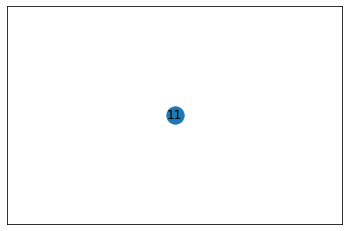

In [3]:
G.add_node(11)    # add a single node
print(G.nodes())
nx.draw_networkx(G, with_labels=True)

[11, 12, 13]
number of nodes in the graph: 3


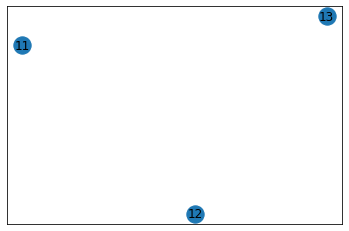

In [4]:
G.add_nodes_from([12,13])    # add a list of nodes
nx.draw_networkx(G, with_labels=True)
print(G.nodes())
print('number of nodes in the graph:', G.number_of_nodes())

### Edges

[1, 2, 3] [(1, 2)]


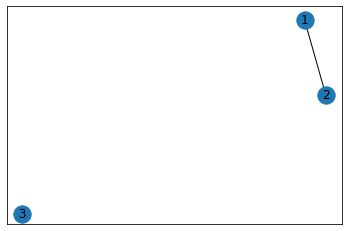

In [5]:
G.clear()
G.add_nodes_from([1,2,3])
G.add_edge(1,2)
print(G.nodes(), G.edges())
nx.draw_networkx(G, with_labels=True)

[]
[(1, 3), (2, 3)]


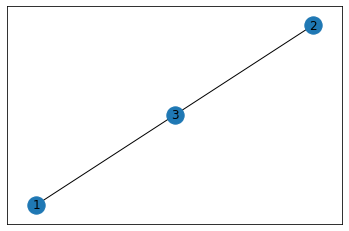

In [6]:
G.remove_edge(1,2)
print(G.edges())
G.add_edges_from([(2,3), (1,3)]) # add edges from a edge list
print(G.edges())
nx.draw_networkx(G, with_labels=True)

Same code convention applies for remove_node(), remove_nodes_from()..

[0, 1, 2, 3, 4]


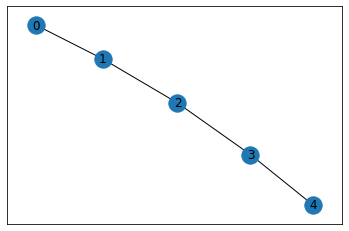

In [7]:
G.clear()
G=nx.path_graph(5) # 0 -> 1 -> 2 -> 3 -> 4
print(G.nodes())
G.edges()
nx.draw_networkx(G, with_labels=True)

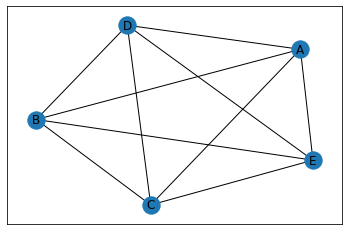

In [8]:
G.clear()
G = nx.complete_graph ('ABCDE')
nx.draw_networkx(G, with_labels=True)

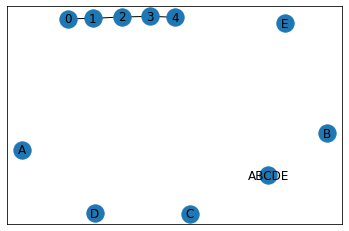

In [9]:
G.clear()
G=nx.path_graph(5) # 0 -> 1 -> 2 -> 3 -> 4
G.add_node("ABCDE")  # add one node called "ABCDE"
G.add_nodes_from("ABCDE") # add 5 nodes: 'A', 'B', 'C', 'D', 'E', since string "ABCDE" in python is actually a list ['A', 'B', 'C', 'D', 'E']
nx.draw_networkx(G, with_labels=True)

In [10]:
print('nodes in the graph:', G.nodes())
print('number of nodes in the graph:', G.number_of_nodes())

nodes in the graph: [0, 1, 2, 3, 4, 'ABCDE', 'A', 'B', 'C', 'D', 'E']
number of nodes in the graph: 11


In [11]:
print('edges in the graph:', G.edges())
print('number of edges in the graph:', G.number_of_edges())

edges in the graph: [(0, 1), (1, 2), (2, 3), (3, 4)]
number of edges in the graph: 4


### Graph From Adjacency Matrix
Given an adjacency matrix generate a networkx graph [[0, 1, 1], [1, 0, 0], [0, 1, 0]]

In [26]:
adj = np.array([[0, 1, 1],
              [1, 0, 1],
              [1, 1, 0]])
G = nx.Graph(np.array(A))

In [27]:
adj

array([[0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]])

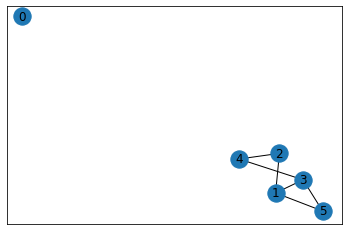

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
nx.draw_networkx(G, with_labels=True)
plt.show()

In [29]:
G.clear()
G.add_nodes_from([0, 1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (1, 3), (1, 5), (2, 4), (3, 4), (3, 5)])

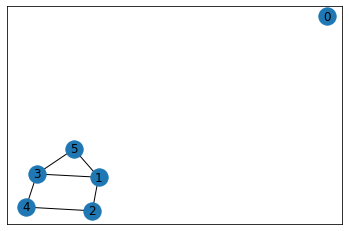

In [30]:
nx.draw_networkx(G, with_labels=True)

### Degree
How many direct links a node has to other nodes <br>
In the case of a directed network it is possible to calculate both indegree (incoming connections) and outdegree (outoing connections).

In [31]:
G.degree()

DegreeView({0: 0, 1: 3, 2: 2, 3: 3, 4: 2, 5: 2})

In [32]:
nx.shortest_path (G, 2, 5)

[2, 1, 5]

## Calculations of multiple centrality

### Degree Centrality

* **Definition**: Degree centrality assigns an importance score based purely on the number of links held by each node.

* **What it tells us**: How many direct, ‘one hop’ connections each node has to other nodes within the network.

* **When to use it**: For finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.

* **A bit more detail**: Degree centrality is the simplest measure of node connectivity. Sometimes it’s useful to look at in-degree (number of inbound links) and out-degree (number of outbound links) as distinct measures, for example when looking at transactional data or account activity.

https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.centrality.degree_centrality.html

In [33]:
nx.degree_centrality(G)

{0: 0.0, 1: 0.6000000000000001, 2: 0.4, 3: 0.6000000000000001, 4: 0.4, 5: 0.4}

### Betweenness Centrality

* **Definition**: Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.
$$c_B(v_i) = \frac{2}{(n-1)(n-2)}\sum_{j\neq i}\sum_{k\neq i, k> j}\frac{g_{jk}(y_i)}{g_{jk}}$$
$g_{jk}$ = number of shortest paths joining vertices $v_j$ and $v_k$<br>
$g_{jk}(v_i)$ = number of such paths that go throgh $v_j$

* **What it tells us**: This measure shows which nodes act as ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one， which indicates the ability of node to control information between other nodes

* **When to use it**: For finding the individuals who influence the flow around a system.

* **A bit more detail**: Betweenness is useful for analyzing communication dynamics, but should be used with care. A high betweenness count could indicate someone holds authority over, or controls collaboration between, disparate clusters in a network; or indicate they are on the periphery of both clusters. A node may not be locally central, but may still have a high betweeness centrality

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html

In [34]:
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.15000000000000002,
 2: 0.05,
 3: 0.15000000000000002,
 4: 0.05,
 5: 0.0}

### Closeness Centrality

* **Definition**: Closeness is the sum of shortest paths of a node to other nodes in the network. It measure scores each node based on their ‘closeness’ to all other nodes within the network.
$$c_c(v_i) = \frac{n-1}{\sum_{j\neq i}d(v_i, v_j)}$$ where $d(v_i, v_j)$ is the length of shortest path between $i$ and $j$

* **What it tells us**: This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths. It indicates how quickly a node can interact with other nodes

* **When to use it**: For finding the individuals who are best placed to influence the entire network most quickly.

* **A bit more detail**: Closeness centrality can help find good ‘broadcasters’, but in a highly connected network you will often find all nodes have a similar score. What may be more useful is using Closeness to find influencers within a single cluster.

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.closeness_centrality.html

In [35]:
nx.closeness_centrality(G)

{0: 0.0,
 1: 0.6400000000000001,
 2: 0.5333333333333333,
 3: 0.6400000000000001,
 4: 0.5333333333333333,
 5: 0.5333333333333333}

### Eigenvector Centrality
* **Definition**: Like degree centrality, EigenCentrality measures a node’s influence based on the number of links it has to other nodes within the network. EigenCentrality then goes a step further by also taking into account how well connected a node is, and how many links their connections have, and so on through the network.

* **What it tells us**: By calculating the extended connections of a node, EigenCentrality can identify nodes with influence over the whole network, not just those directly connected to it.

* **When to use it**: EigenCentrality is a good ‘all-round’ SNA score, handy for understanding human social networks, but also for understanding networks like malware propagation.

* **A bit more detail**: KeyLines calculates each node’s EigenCentrality by converging on an eigenvector using the power iteration method. Learn more.

https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality

In [36]:
nx.eigenvector_centrality(G)

{0: 3.397608522718058e-09,
 1: 0.5298986664246759,
 2: 0.3577526299856115,
 3: 0.5298986664246759,
 4: 0.35775262998561147,
 5: 0.4271310315575966}

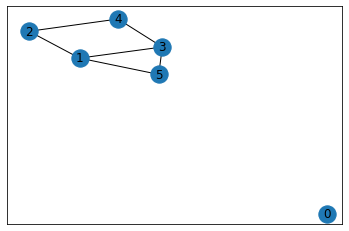

In [42]:
A = np.array([[0, 0, 0, 0, 0, 0],
                [0, 0, 1, 1, 0, 1],
                [0, 1, 0, 0, 1, 0],
                [0, 1, 0, 0, 1, 1],
                [0, 0, 1, 1, 0, 0],
                [0, 1, 0, 1, 0, 0]])
G = nx.Graph(A)
nx.draw_networkx(G, with_labels=True)
plt.show()

In [43]:
from numpy import linalg as LA

In [44]:
w, v = LA.eig(A)

In [45]:
w

array([-1.17008649e+00,  6.88892183e-01,  2.48119430e+00, -2.00000000e+00,
        2.25371043e-32,  0.00000000e+00])

In [46]:
np.round(v, 4)

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [-0.4325, -0.1793, -0.5299, -0.5   ,  0.5   ,  0.    ],
       [ 0.1993,  0.5765, -0.3578,  0.5   ,  0.5   ,  0.    ],
       [-0.4325, -0.1793, -0.5299,  0.5   , -0.5   ,  0.    ],
       [ 0.1993,  0.5765, -0.3578, -0.5   , -0.5   ,  0.    ],
       [ 0.7392, -0.5207, -0.4271, -0.    , -0.    ,  0.    ]])

## Directed Graph

In [47]:
DG = nx.DiGraph()

In [48]:
DG.add_nodes_from(['v1', 'v2', 'v3', 'v4'])
DG.add_edges_from([('v1', 'v2'), ('v1', 'v3'), ('v1', 'v4'),
                 ('v2', 'v3'), ('v2', 'v4'), 
                 ('v3', 'v1'), ('v3', 'v4'),
                 ('v4', 'v1')])

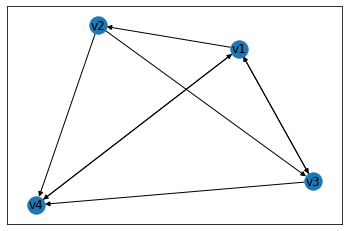

In [49]:
nx.draw_networkx(DG, with_labels=True)
plt.show()

In [50]:
DG.degree()

DiDegreeView({'v1': 5, 'v2': 3, 'v3': 4, 'v4': 4})

In [51]:
DG.in_degree()

InDegreeView({'v1': 2, 'v2': 1, 'v3': 2, 'v4': 3})

In [52]:
DG.out_degree()

OutDegreeView({'v1': 3, 'v2': 2, 'v3': 2, 'v4': 1})